In [1]:
from useful_scit.imps import *
import check_input_01_funs
importlib.reload(check_input_01_funs)
from check_input_01_funs import *
matplotlib.rcParams['figure.figsize'] = (9.0, 6.0)

In [2]:
path = '/Volumes/mbProD/Downloads/met'

In [3]:
files = glob.glob(path+'/met*')
files.sort()

In [4]:
f = files[1]

In [22]:
ta = xr.open_dataset(f)

In [6]:
# var = list(ta.variables)
# for v in var:
#     try: 
#         print(v,ta[v].description)
#     except: pass

In [10]:
xas = [xr.open_dataset(f)[['TT','LU_INDEX','XLAT_M','XLONG_M','Times','SKINTEMP']] for f in files[1:]]
xas1 = []
for xa in xas:
    t1=xa.Times.to_dataframe().Times.str.decode('utf-8')
    t1=pd.to_datetime(t1.values,format='%Y-%m-%d_%H:%M:%S')
    xa=xa.assign_coords(Time=t1)
    xas1.append(xa)

In [11]:
xa = xr.concat(xas,dim='Time')
xa = xa.assign_coords(XLAT=xa.XLAT_M.isel(Time=0))
xa = xa.assign_coords(XLONG=xa.XLONG_M.isel(Time=0))

In [17]:
t1=xa.Times.to_dataframe().Times.str.decode('utf-8')
t1=pd.to_datetime(t1.values,format='%Y-%m-%d_%H:%M:%S')
xa=xa.assign_coords(Time=t1)

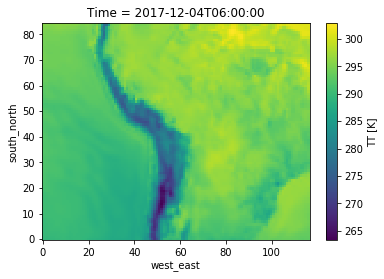

In [18]:
xa.TT.isel(num_metgrid_levels=0,Time=12).plot()

In [19]:
xa.Time

<xarray.DataArray 'Time' (Time: 732)>
array(['2017-12-01T06:00:00.000000000', '2017-12-01T12:00:00.000000000',
       '2017-12-01T18:00:00.000000000', ..., '2018-06-01T12:00:00.000000000',
       '2018-06-01T18:00:00.000000000', '2018-06-02T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * Time     (Time) datetime64[ns] 2017-12-01T06:00:00 ... 2018-06-02

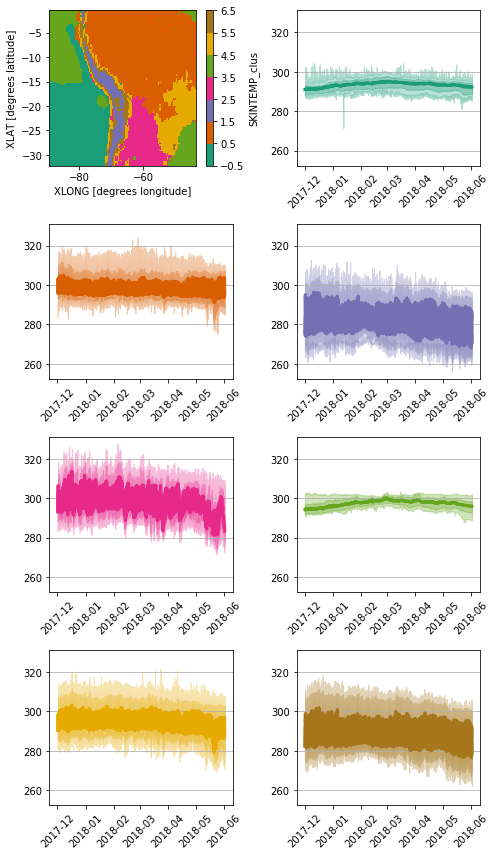

In [20]:
# xa['T0']=xa.TT.isel(num_metgrid_levels=0)
p = 'SKINTEMP'
p_c = 'SKINTEMP_clus'
nc = 7
cols = 2
plot_clus_sig(xa,p,p_c,nc,cols=2)

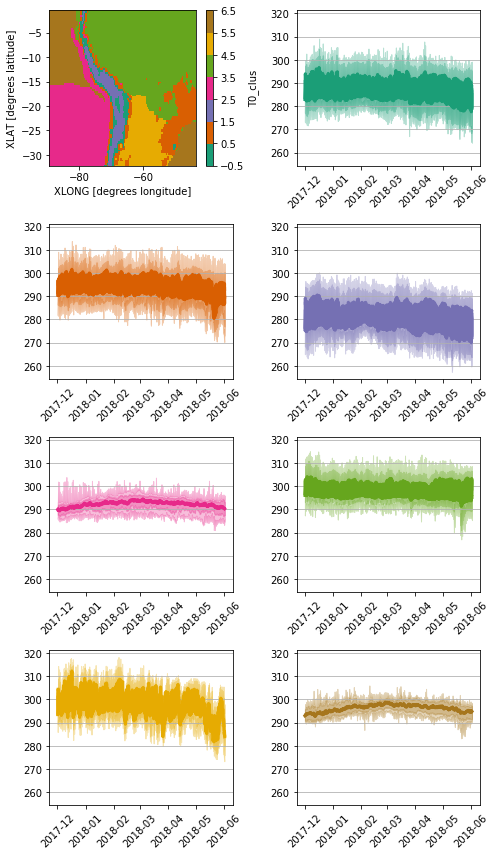

In [21]:
xa['T0']=xa.TT.isel(num_metgrid_levels=0)
p = 'T0'
p_c = p+'_clus'
nc = 7
cols = 2
plot_clus_sig(xa,p,p_c,nc,cols=2)

In [29]:
x1 = xa[['SKINTEMP']].where(xa.LU_INDEX[0]==21).isel(Time=slice(1,None))

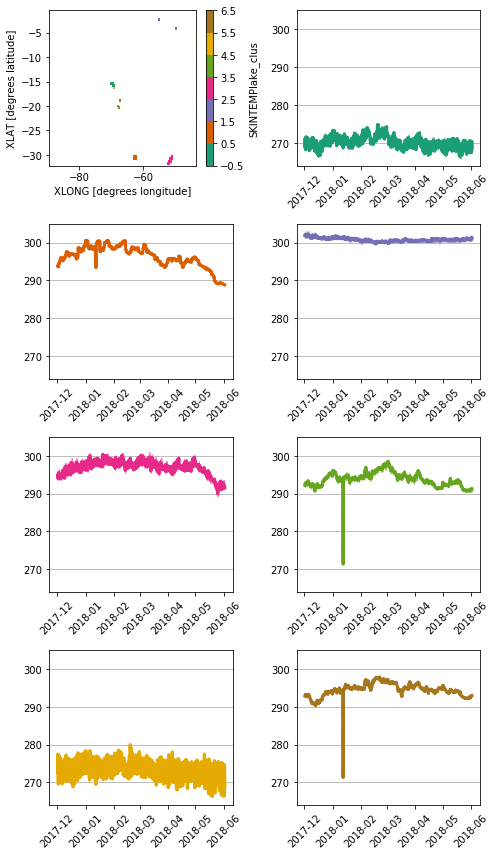

In [32]:
p = 'SKINTEMP'
p_c = p+'lake_clus'
nc = 7
cols = 2
plot_clus_sig(x1,p,p_c,nc,cols=2)